In [1]:
#Panda way of dealing with dates
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
#Docs: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
train_stock_prices = pd.read_csv("../tokyo/train_files/stock_prices.csv",parse_dates=["Date"])
#pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', 500)
train_stock_prices.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   RowId             2332531 non-null  object        
 1   Date              2332531 non-null  datetime64[ns]
 2   SecuritiesCode    2332531 non-null  int64         
 3   Open              2324923 non-null  float64       
 4   High              2324923 non-null  float64       
 5   Low               2324923 non-null  float64       
 6   Close             2324923 non-null  float64       
 7   Volume            2332531 non-null  int64         
 8   AdjustmentFactor  2332531 non-null  float64       
 9   ExpectedDividend  18865 non-null    float64       
 10  SupervisionFlag   2332531 non-null  bool          
 11  Target            2332293 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 198.0+ MB


In [2]:
zero_volumes = train_stock_prices.query("Volume == 0")
zero_volumes

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
401,20170104_3540,2017-01-04,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
1753,20170104_9539,2017-01-04,9539,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.004149
2266,20170105_3540,2017-01-05,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
2511,20170105_4621,2017-01-05,4621,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
4131,20170106_3540,2017-01-06,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2330563,20211203_1787,2021-12-03,1787,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.030351
2330786,20211203_2761,2021-12-03,2761,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
2331453,20211203_5918,2021-12-03,5918,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.015625
2332336,20211203_9083,2021-12-03,9083,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.009615


In [3]:
sec_codes = pd.DataFrame(zero_volumes["SecuritiesCode"].unique())
stock_list = pd.read_csv("../tokyo/stock_list.csv",parse_dates=["EffectiveDate","TradeDate"])
stock_names = stock_list[["Name","SecuritiesCode"]].set_index("SecuritiesCode")
zero_volume_names = sec_codes.set_index(0).join(stock_names)
zero_volume_names
#when volume is 0 it might mean there is low amount of float shares
#the holders of the two companies are whales holding ~70%,~90% of shares that's why there is no volume,targets
#https://finance.yahoo.com/quote/3540.T/holders?p=3540.T
#https://finance.yahoo.com/quote/9539.T/holders?p=9539.T

,Name
0,
3540,"C.I.MEDICAL CO.,LTD."
9539,"KEIYO GAS CO.,LTD."
4621,"ROCK PAINT CO.,LTD."
2831,HAGOROMO FOODS CORPORATION
3597,"JICHODO Co.,Ltd."
...,...
9997,"BELLUNA CO.,LTD."
2987,TASUKI Corporation
4165,"PLAID,Inc."


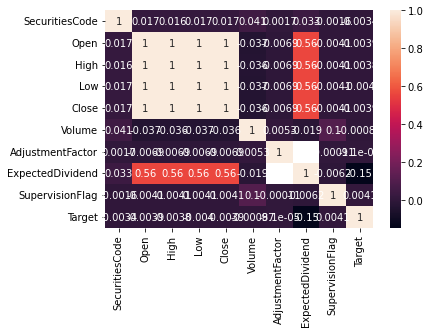

In [4]:
corr_matrix = train_stock_prices.corr()
sn.heatmap(corr_matrix,annot=True)
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

In [5]:
unique_securities_codes = train_stock_prices["SecuritiesCode"].unique()
usc = unique_securities_codes
tsp = train_stock_prices
usc

array([1301, 1332, 1333, ..., 4168, 7342, 4169])

In [6]:
ffill_tsp = tsp.loc[:,["SecuritiesCode","Open","Close","Low","High"]].groupby("SecuritiesCode").transform(lambda x: x.ffill())
ffill_tsp.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Open    2332267 non-null  float64
 1   Close   2332267 non-null  float64
 2   Low     2332267 non-null  float64
 3   High    2332267 non-null  float64
dtypes: float64(4)
memory usage: 71.2 MB


In [7]:

ffill_tsp.reset_index()
tsp.update(ffill_tsp)
tsp.loc[tsp.SecuritiesCode == 6502]

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
1032,20170104_6502,2017-01-04,6502,268.0,293.8,263.5,277.4,362027000,1.0,NaN,False,-0.011360
2897,20170105_6502,2017-01-05,6502,282.0,291.5,277.8,290.5,219540000,1.0,NaN,False,0.004875
4762,20170106_6502,2017-01-06,6502,286.6,295.4,283.0,287.2,162399000,1.0,NaN,False,0.043313
6627,20170110_6502,2017-01-10,6502,290.1,291.7,283.5,288.6,93120000,1.0,NaN,False,-0.054135
8492,20170111_6502,2017-01-11,6502,294.0,307.2,293.4,301.1,209023000,1.0,NaN,False,0.008076
...,...,...,...,...,...,...,...,...,...,...,...,...
2323640,20211129_6502,2021-11-29,6502,4525.0,4635.0,4505.0,4587.0,1598800,1.0,NaN,False,0.007290
2325640,20211130_6502,2021-11-30,6502,4653.0,4667.0,4526.0,4527.0,3068500,1.0,NaN,False,0.014474
2327640,20211201_6502,2021-12-01,6502,4512.0,4589.0,4506.0,4560.0,1722800,1.0,NaN,False,0.025292
2329640,20211202_6502,2021-12-02,6502,4528.0,4635.0,4521.0,4626.0,1527000,1.0,NaN,False,-0.011174


In [8]:
tsp.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   RowId             2332531 non-null  object        
 1   Date              2332531 non-null  datetime64[ns]
 2   SecuritiesCode    2332531 non-null  int64         
 3   Open              2332267 non-null  float64       
 4   High              2332267 non-null  float64       
 5   Low               2332267 non-null  float64       
 6   Close             2332267 non-null  float64       
 7   Volume            2332531 non-null  int64         
 8   AdjustmentFactor  2332531 non-null  float64       
 9   ExpectedDividend  18865 non-null    float64       
 10  SupervisionFlag   2332531 non-null  bool          
 11  Target            2332293 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 198.0+ MB


In [9]:
na_sc = tsp.loc[tsp.Close.isna()]
na_sc

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
401,20170104_3540,2017-01-04,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
1753,20170104_9539,2017-01-04,9539,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.004149
2266,20170105_3540,2017-01-05,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
4131,20170106_3540,2017-01-06,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
5996,20170110_3540,2017-01-10,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1757328,20201002_2987,2020-10-02,2987,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
1759317,20201005_2987,2020-10-05,2987,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.153465
1861112,20201217_4165,2020-12-17,4165,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.098093
1863108,20201218_4167,2020-12-18,4167,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.076566


In [40]:
na_count = na_sc.groupby("SecuritiesCode").count()
na_count.reset_index()

,SecuritiesCode,RowId,Date,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,2987,2,2,0,0,0,0,2,2,0,2,1
1,3540,236,236,0,0,0,0,236,236,1,236,1
2,3561,1,1,0,0,0,0,1,1,0,1,1
3,3984,1,1,0,0,0,0,1,1,0,1,1
4,3990,1,1,0,0,0,0,1,1,0,1,1
5,4051,1,1,0,0,0,0,1,1,0,1,1
6,4056,2,2,0,0,0,0,2,2,0,2,1
7,4058,1,1,0,0,0,0,1,1,0,1,1
8,4165,1,1,0,0,0,0,1,1,0,1,1
9,4167,1,1,0,0,0,0,1,1,0,1,1


In [38]:
#firsts_sc = tsp.groupby("SecuritiesCode")["Close"]
#firsts_sc
#firsts_sc.loc[firsts_sc.isna()]
na_heads = tsp.groupby("SecuritiesCode").head(n=1)[tsp.Close.isna()]
na_heads

/tmp/ipykernel_65585/1172268610.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_heads = tsp.groupby("SecuritiesCode").head(n=1)[tsp.Close.isna()]


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
401,20170104_3540,2017-01-04,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
1753,20170104_9539,2017-01-04,9539,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.004149
97416,20170321_3561,2017-03-21,3561,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.190114
110623,20170330_3984,2017-03-30,3984,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.085806
305861,20170830_3990,2017-08-30,3990,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.100619
565978,20180323_9450,2018-03-23,9450,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.225104
569084,20180327_6572,2018-03-27,6572,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.069343
602849,20180420_4382,2018-04-20,4382,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
918507,20181219_4425,2018-12-19,4425,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.008639
922976,20181221_7047,2018-12-21,7047,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.050000


In [54]:
#na_sc.loc[na_sc.SecuritiesCode == 3540,"Date"]
#na_sc.plot_dates("Date","Volume")
na_non_match = pd.merge(na_heads,na_count,how="outer",indicator=True,on="SecuritiesCode")
na_non_match = na_non_match[(na_non_match._merge!="both")]
na_non_match

,RowId_x,Date_x,SecuritiesCode,Open_x,High_x,Low_x,Close_x,Volume_x,AdjustmentFactor_x,ExpectedDividend_x,SupervisionFlag_x,Target_x,RowId_y,Date_y,Open_y,High_y,Low_y,Close_y,Volume_y,AdjustmentFactor_y,ExpectedDividend_y,SupervisionFlag_y,Target_y,_merge


In [46]:
two_or_more_na = na_count.loc[na_count.Volume > 1]
two_or_more_na

,RowId,Date,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
SecuritiesCode,,,,,,,,,,,
2987,2,2,0,0,0,0,2,2,0,2,1
3540,236,236,0,0,0,0,236,236,1,236,1
4056,2,2,0,0,0,0,2,2,0,2,1
4382,2,2,0,0,0,0,2,2,1,2,1


In [52]:
mask = tsp.SecuritiesCode.isin(two_or_more_na.index.values)
tsp[mask].groupby("SecuritiesCode").head(n=2)
#https://finance.yahoo.com/chart/2987.T#eyJpbnRlcnZhbCI6ImRheSIsInBlcmlvZGljaXR5IjoxLCJ0aW1lVW5pdCI6bnVsbCwiY2FuZGxlV2lkdGgiOjI3LjUsImZsaXBwZWQiOmZhbHNlLCJ2b2x1bWVVbmRlcmxheSI6dHJ1ZSwiYWRqIjp0cnVlLCJjcm9zc2hhaXIiOnRydWUsImNoYXJ0VHlwZSI6Im1vdW50YWluIiwiZXh0ZW5kZWQiOmZhbHNlLCJtYXJrZXRTZXNzaW9ucyI6e30sImFnZ3JlZ2F0aW9uVHlwZSI6Im9obGMiLCJjaGFydFNjYWxlIjoicGVyY2VudCIsInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiMjk4Ny5UIiwiY2hhcnROYW1lIjoiY2hhcnQiLCJpbmRleCI6MCwieUF4aXMiOnsibmFtZSI6ImNoYXJ0IiwicG9zaXRpb24iOm51bGx9LCJ5YXhpc0xIUyI6W10sInlheGlzUkhTIjpbImNoYXJ0Iiwi4oCMdm9sIHVuZHLigIwiXX19LCJzZXRTcGFuIjpudWxsLCJsaW5lV2lkdGgiOjIsInN0cmlwZWRCYWNrZ3JvdW5kIjp0cnVlLCJldmVudHMiOmZhbHNlLCJjb2xvciI6IiMwMDgxZjIiLCJzdHJpcGVkQmFja2dyb3VkIjp0cnVlLCJldmVudE1hcCI6eyJjb3Jwb3JhdGUiOnsiZGl2cyI6dHJ1ZSwic3BsaXRzIjp0cnVlfSwic2lnRGV2Ijp7InNpZ2Rldl9jb3Jwb3JhdGVfZ3VpZGFuY2UiOnRydWUsInNpZ2Rldl9wZXJmb3JtYW5jZSI6dHJ1ZX19LCJjdXN0b21SYW5nZSI6bnVsbCwic3ltYm9scyI6W3sic3ltYm9sIjoiMjk4Ny5UIiwic3ltYm9sT2JqZWN0Ijp7InN5bWJvbCI6IjI5ODcuVCIsInF1b3RlVHlwZSI6IkVRVUlUWSIsImV4Y2hhbmdlVGltZVpvbmUiOiJBc2lhL1Rva3lvIn0sInBlcmlvZGljaXR5IjoxLCJpbnRlcnZhbCI6ImRheSIsInRpbWVVbml0IjpudWxsLCJzZXRTcGFuIjpudWxsfV0sInN0dWRpZXMiOnsi4oCMdm9sIHVuZHLigIwiOnsidHlwZSI6InZvbCB1bmRyIiwiaW5wdXRzIjp7ImlkIjoi4oCMdm9sIHVuZHLigIwiLCJkaXNwbGF5Ijoi4oCMdm9sIHVuZHLigIwifSwib3V0cHV0cyI6eyJVcCBWb2x1bWUiOiJyZ2JhKDIwMCwgMjQwLCAyMjAsIDAuOCkiLCJEb3duIFZvbHVtZSI6InJnYmEoMjU1LCA0OCwgNjAsIDAuOCkifSwicGFuZWwiOiJjaGFydCIsInBhcmFtZXRlcnMiOnsid2lkdGhGYWN0b3IiOjAuNDUsImNoYXJ0TmFtZSI6ImNoYXJ0IiwicGFuZWxOYW1lIjoiY2hhcnQifX19LCJyYW5nZSI6bnVsbH0-
#https://finance.yahoo.com/chart/4056.T#eyJpbnRlcnZhbCI6ImRheSIsInBlcmlvZGljaXR5IjoxLCJ0aW1lVW5pdCI6bnVsbCwiY2FuZGxlV2lkdGgiOjIuMDkzMTc1ODUzMDE4MzczLCJmbGlwcGVkIjpmYWxzZSwidm9sdW1lVW5kZXJsYXkiOnRydWUsImFkaiI6dHJ1ZSwiY3Jvc3NoYWlyIjp0cnVlLCJjaGFydFR5cGUiOiJtb3VudGFpbiIsImV4dGVuZGVkIjpmYWxzZSwibWFya2V0U2Vzc2lvbnMiOnt9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6InBlcmNlbnQiLCJwYW5lbHMiOnsiY2hhcnQiOnsicGVyY2VudCI6MSwiZGlzcGxheSI6IjQwNTYuVCIsImNoYXJ0TmFtZSI6ImNoYXJ0IiwiaW5kZXgiOjAsInlBeGlzIjp7Im5hbWUiOiJjaGFydCIsInBvc2l0aW9uIjpudWxsfSwieWF4aXNMSFMiOltdLCJ5YXhpc1JIUyI6WyJjaGFydCIsIuKAjHZvbCB1bmRy4oCMIl19fSwic2V0U3BhbiI6bnVsbCwibGluZVdpZHRoIjoyLCJzdHJpcGVkQmFja2dyb3VuZCI6dHJ1ZSwiZXZlbnRzIjpmYWxzZSwiY29sb3IiOiIjMDA4MWYyIiwic3RyaXBlZEJhY2tncm91ZCI6dHJ1ZSwicmFuZ2UiOm51bGwsImV2ZW50TWFwIjp7ImNvcnBvcmF0ZSI6eyJkaXZzIjp0cnVlLCJzcGxpdHMiOnRydWV9LCJzaWdEZXYiOnsic2lnZGV2X2NvcnBvcmF0ZV9ndWlkYW5jZSI6dHJ1ZSwic2lnZGV2X3BlcmZvcm1hbmNlIjp0cnVlfX0sImN1c3RvbVJhbmdlIjpudWxsLCJzeW1ib2xzIjpbeyJzeW1ib2wiOiI0MDU2LlQiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiNDA1Ni5UIiwicXVvdGVUeXBlIjoiRVFVSVRZIiwiZXhjaGFuZ2VUaW1lWm9uZSI6IkFzaWEvVG9reW8ifSwicGVyaW9kaWNpdHkiOjEsImludGVydmFsIjoiZGF5IiwidGltZVVuaXQiOm51bGwsInNldFNwYW4iOm51bGx9XSwic3R1ZGllcyI6eyLigIx2b2wgdW5kcuKAjCI6eyJ0eXBlIjoidm9sIHVuZHIiLCJpbnB1dHMiOnsiaWQiOiLigIx2b2wgdW5kcuKAjCIsImRpc3BsYXkiOiLigIx2b2wgdW5kcuKAjCJ9LCJvdXRwdXRzIjp7IlVwIFZvbHVtZSI6InJnYmEoMjAwLCAyNDAsIDIyMCwgMC44KSIsIkRvd24gVm9sdW1lIjoicmdiYSgyNTUsIDQ4LCA2MCwgMC44KSJ9LCJwYW5lbCI6ImNoYXJ0IiwicGFyYW1ldGVycyI6eyJ3aWR0aEZhY3RvciI6MC40NSwiY2hhcnROYW1lIjoiY2hhcnQiLCJwYW5lbE5hbWUiOiJjaGFydCJ9fX19
#https://finance.yahoo.com/chart/3540.T#eyJpbnRlcnZhbCI6ImRheSIsInBlcmlvZGljaXR5IjoxLCJ0aW1lVW5pdCI6bnVsbCwiY2FuZGxlV2lkdGgiOjguOTYwNjc0MTU3MzAzMzcxLCJmbGlwcGVkIjpmYWxzZSwidm9sdW1lVW5kZXJsYXkiOnRydWUsImFkaiI6dHJ1ZSwiY3Jvc3NoYWlyIjp0cnVlLCJjaGFydFR5cGUiOiJtb3VudGFpbiIsImV4dGVuZGVkIjpmYWxzZSwibWFya2V0U2Vzc2lvbnMiOnt9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6InBlcmNlbnQiLCJwYW5lbHMiOnsiY2hhcnQiOnsicGVyY2VudCI6MSwiZGlzcGxheSI6IjM1NDAuVCIsImNoYXJ0TmFtZSI6ImNoYXJ0IiwiaW5kZXgiOjAsInlBeGlzIjp7Im5hbWUiOiJjaGFydCIsInBvc2l0aW9uIjpudWxsfSwieWF4aXNMSFMiOltdLCJ5YXhpc1JIUyI6WyJjaGFydCIsIuKAjHZvbCB1bmRy4oCMIl19fSwic2V0U3BhbiI6bnVsbCwibGluZVdpZHRoIjoyLCJzdHJpcGVkQmFja2dyb3VuZCI6dHJ1ZSwiZXZlbnRzIjpmYWxzZSwiY29sb3IiOiIjMDA4MWYyIiwic3RyaXBlZEJhY2tncm91ZCI6dHJ1ZSwicmFuZ2UiOm51bGwsImV2ZW50TWFwIjp7ImNvcnBvcmF0ZSI6eyJkaXZzIjp0cnVlLCJzcGxpdHMiOnRydWV9LCJzaWdEZXYiOnsic2lnZGV2X2NvcnBvcmF0ZV9ndWlkYW5jZSI6dHJ1ZSwic2lnZGV2X3BlcmZvcm1hbmNlIjp0cnVlfX0sImN1c3RvbVJhbmdlIjpudWxsLCJzeW1ib2xzIjpbeyJzeW1ib2wiOiIzNTQwLlQiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiMzU0MC5UIiwicXVvdGVUeXBlIjoiRVFVSVRZIiwiZXhjaGFuZ2VUaW1lWm9uZSI6IkFzaWEvVG9reW8ifSwicGVyaW9kaWNpdHkiOjEsImludGVydmFsIjoiZGF5IiwidGltZVVuaXQiOm51bGwsInNldFNwYW4iOm51bGx9XSwic3R1ZGllcyI6eyLigIx2b2wgdW5kcuKAjCI6eyJ0eXBlIjoidm9sIHVuZHIiLCJpbnB1dHMiOnsiaWQiOiLigIx2b2wgdW5kcuKAjCIsImRpc3BsYXkiOiLigIx2b2wgdW5kcuKAjCJ9LCJvdXRwdXRzIjp7IlVwIFZvbHVtZSI6InJnYmEoMjAwLCAyNDAsIDIyMCwgMC44KSIsIkRvd24gVm9sdW1lIjoicmdiYSgyNTUsIDQ4LCA2MCwgMC44KSJ9LCJwYW5lbCI6ImNoYXJ0IiwicGFyYW1ldGVycyI6eyJ3aWR0aEZhY3RvciI6MC40NSwiY2hhcnROYW1lIjoiY2hhcnQiLCJwYW5lbE5hbWUiOiJjaGFydCJ9fX19
#the null values might be present because of the rows in financials.csv that might have values about companies initial valuation

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
401,20170104_3540,2017-01-04,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
2266,20170105_3540,2017-01-05,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
602849,20180420_4382,2018-04-20,4382,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
604752,20180423_4382,2018-04-23,4382,NaN,NaN,NaN,NaN,0,1.0,0.0,False,-0.166667
1700064,20200820_4056,2020-08-20,4056,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
1702046,20200821_4056,2020-08-21,4056,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.163934
1757328,20201002_2987,2020-10-02,2987,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
1759317,20201005_2987,2020-10-05,2987,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.153465
